# Segmentation
This notebook is meant to segment the brain scans to find the different brain metastases.\
On the first try, we'll use AURORA https://github.com/BrainLesion/AURORA

In [1]:
from brainles_aurora.inferer import AuroraInferer, AuroraInfererConfig
import nibabel as nib
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [8]:
DATA_FOLDER = "data"

def visualize_data(data_folder: str = DATA_FOLDER, slice_index: int =100):
    """Visualize the MRI modalities for a given slice index

    Args:
        data_folder (str, optional): Path to the folder containing the t1, t1c, t2 & flair file. Defaults to DATA_FOLDER.
        slice_index (int, optional): Slice to be visualized (first index in data of shape (155, 240, 240)). Defaults to 75.
    """
    _, axes = plt.subplots(1, 4, figsize=(12, 10))

    modalities = ["t1", "t1c", "t2", "flair"]
    for i, mod in enumerate(modalities):
        modality_file = os.path.join(data_folder, f"{mod}.nii.gz")
        modality_np = nib.load(modality_file).get_fdata().transpose(2, 1, 0)
        axes[i].set_title(mod)
        axes[i].imshow(modality_np[slice_index, :, :], cmap="gray")
        axes[i].axis("off")


def visualize_segmentation(modality_file: str, segmentation_file: str):
    """Visualize the MRI modality and the segmentation

    Args:
        modality_file (str): Path to the desired modality file
        segmentation_file (str): Path to the segmentation file
    """
    modality_np = nib.load(modality_file).get_fdata().transpose(2, 1, 0)
    seg_np = nib.load(segmentation_file).get_fdata().transpose(2, 1, 0)
    _, ax = plt.subplots(1, 2, figsize=(8, 4))

    slice_index = modality_np.shape[0] // 2  # You can choose any slice here
    slice_index = 120
    ax[0].imshow(modality_np[slice_index, :, :], cmap="gray")
    ax[1].imshow(modality_np[slice_index, :, :], cmap="gray")
    ax[1].imshow(seg_np[slice_index, :, :], cmap="plasma", alpha=0.3)
    for ax in ax:
        ax.axis("off")
    plt.tight_layout()

In [3]:
path_to_test_folder = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Segmentation/AURORA-main2/example/data")

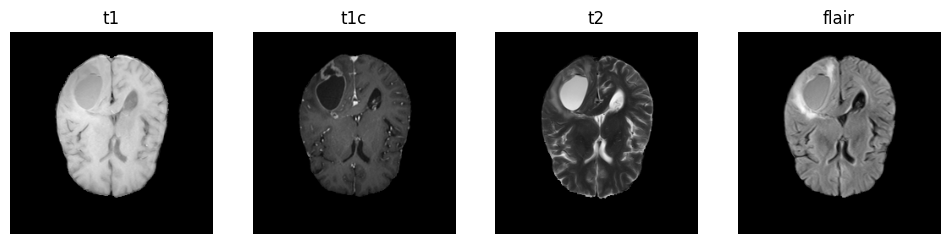

In [4]:
visualize_data(path_to_test_folder)

In [5]:
# We first need to create an instance of the AuroraInfererConfig class,
# which will hold the configuration for the inferer.
# We can then create an instance of the AuroraInferer class, which will be used to perform the inference.

config = AuroraInfererConfig(
    tta=False,
    # we disable test time augmentations for a quick demo
    # should be set to True for better results
    sliding_window_batch_size=4,
    # The batch size used for the sliding window inference
    # decrease if you run out of memory
    # warning: too small batches might lead to unstable results
    #cuda_devices="0",  # optional, if you have multiple GPUs you can specify which one to use
    device="cpu",  # uncomment this line to force-use CPU
)


# Now that we have the configuration we can create an instance of the AuroraInferer class.
# This class will be used to perform the inference. We can then call the infer method to perform the inference.
inferer = AuroraInferer(config=config)

# if torch.cuda.is_available() == False:
#     raise RuntimeWarning(
#         "You are not using any GPU in Colab! Go to 'Runtime'->'Change Runtime type' to select GPU usage!"
#     )

# The infer method takes the path to the T1c MRI file and the path to the output segmentation file as arguments.
# The output segmentation file will be created by the infer method and
# will contain the segmentation of the input T1c MRI.

# The example below shows how to perform the inference using a T1c MRI file:
_ = inferer.infer(
    t1= "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Segmentation/AURORA-main2/example/data/t1.nii.gz",
    segmentation_file= str(path_to_test_folder) + "/output/t1c_segmentation.nii.gz",
)

# IMPORTANT: If this cell produces an OutOfMemoryError, you might not have enough VRAM (minimum 8GB).
# Try using the CPU instead by setting "useGPU" to False above

[INFO     | inferer         | L115  ] | 2024-04-15T15:18:19+0200: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-04-15T15:18:19+0200: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-04-15T15:18:19+0200: Infer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-04-15T15:18:19+0200: Successfully validated input images (received 1). Input mode: DataMode.NIFTI_FILE
[INFO     | data            | L160  ] | 2024-04-15T15:18:19+0200: Received files: T1: True, T1C: False, T2: False, FLAIR: False
[INFO     | data            | L169  ] | 2024-04-15T15:18:19+0200: Inference mode: InferenceMode.T1_O
[INFO     | model           | L58   ] | 2024-04-15T15:18:19+0200: No loaded compatible model found (Switching from None to InferenceMode.T1_O). Loading Model and weights...
[INFO     | model           | L63   ] | 2024-04-15T15:18:19+0200: Successfully loaded model.
[INFO     | inferer    

BasicUNet features: (32, 32, 64, 128, 256, 32).
before: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/InferenceMode.T1_O_ModelSelection.BEST.tar
after: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/t1-o_best.tar


[INFO     | model           | L214  ] | 2024-04-15T15:23:30+0200: Post-processing data
[INFO     | model           | L218  ] | 2024-04-15T15:23:30+0200: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-04-15T15:23:30+0200: Finished inference
[INFO     | inferer         | L222  ] | 2024-04-15T15:23:30+0200: Saving post-processed data as NIfTI files
[INFO     | data            | L263  ] | 2024-04-15T15:23:30+0200: Saved Output.SEGMENTATION to /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Segmentation/AURORA-main2/example/data/output/t1c_segmentation.nii.gz
[INFO     | inferer         | L226  ] | 2024-04-15T15:23:30+0200: ============================ Finished inference run ============================


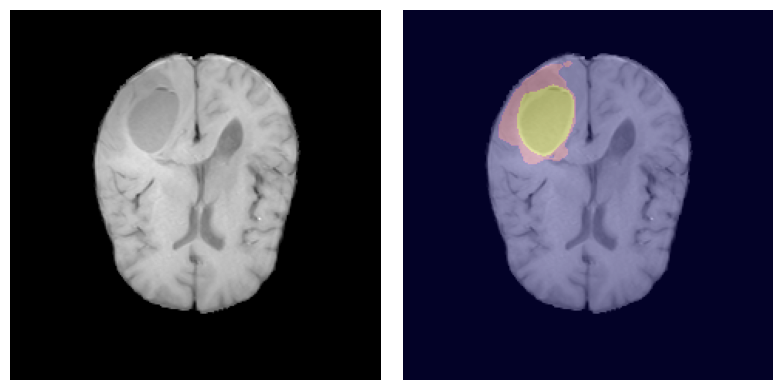

In [7]:
visualize_segmentation(
    modality_file="/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Segmentation/AURORA-main2/example/data/t1.nii.gz",
    segmentation_file="/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Segmentation/AURORA-main2/example/data/output/t1c_segmentation.nii.gz",
)

In [4]:
# We first need to create an instance of the AuroraInfererConfig class,
# which will hold the configuration for the inferer.
# We can then create an instance of the AuroraInferer class, which will be used to perform the inference.

config = AuroraInfererConfig(
    tta=False,
    # we disable test time augmentations for a quick demo
    # should be set to True for better results
    sliding_window_batch_size=4,
    # The batch size used for the sliding window inference
    # decrease if you run out of memory
    # warning: too small batches might lead to unstable results
    #cuda_devices="0",  # optional, if you have multiple GPUs you can specify which one to use
    device="cpu",  # uncomment this line to force-use CPU
)


# Now that we have the configuration we can create an instance of the AuroraInferer class.
# This class will be used to perform the inference. We can then call the infer method to perform the inference.
inferer = AuroraInferer(config=config)

# if torch.cuda.is_available() == False:
#     raise RuntimeWarning(
#         "You are not using any GPU in Colab! Go to 'Runtime'->'Change Runtime type' to select GPU usage!"
#     )

# The infer method takes the path to the T1c MRI file and the path to the output segmentation file as arguments.
# The output segmentation file will be created by the infer method and
# will contain the segmentation of the input T1c MRI.

path = "/Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification/derivatives/preprocessed_mnit_20240417-141158/sub-01009590"

# The example below shows how to perform the inference using a T1c MRI file:
_ = inferer.infer(
    fla= path + "/sub-01009590_FLAIR_preprocessed.nii.gz",
    segmentation_file= path + "/output/t1c_segmentation.nii.gz",
)

# IMPORTANT: If this cell produces an OutOfMemoryError, you might not have enough VRAM (minimum 8GB).
# Try using the CPU instead by setting "useGPU" to False above

[INFO     | inferer         | L115  ] | 2024-04-18T14:47:21+0200: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-04-18T14:47:21+0200: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-04-18T14:47:21+0200: Infer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-04-18T14:47:21+0200: Successfully validated input images (received 1). Input mode: DataMode.NIFTI_FILE
[INFO     | data            | L160  ] | 2024-04-18T14:47:21+0200: Received files: T1: False, T1C: False, T2: False, FLAIR: True
[INFO     | data            | L169  ] | 2024-04-18T14:47:21+0200: Inference mode: InferenceMode.FLA_O
[INFO     | model           | L58   ] | 2024-04-18T14:47:21+0200: No loaded compatible model found (Switching from None to InferenceMode.FLA_O). Loading Model and weights...
[INFO     | model           | L63   ] | 2024-04-18T14:47:21+0200: Successfully loaded model.
[INFO     | inferer  

BasicUNet features: (32, 32, 64, 128, 256, 32).
before: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/InferenceMode.FLA_O_ModelSelection.BEST.tar
after: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/fla-o_best.tar


[INFO     | model           | L214  ] | 2024-04-18T14:59:35+0200: Post-processing data
[INFO     | model           | L218  ] | 2024-04-18T14:59:35+0200: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-04-18T14:59:35+0200: Finished inference
[INFO     | inferer         | L222  ] | 2024-04-18T14:59:35+0200: Saving post-processed data as NIfTI files
[INFO     | data            | L263  ] | 2024-04-18T14:59:35+0200: Saved Output.SEGMENTATION to /Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification/derivatives/preprocessed_mnit_20240417-141158/sub-01009590/output/t1c_segmentation.nii.gz
[INFO     | inferer         | L226  ] | 2024-04-18T14:59:35+0200: ============================ Finished inference run ============================


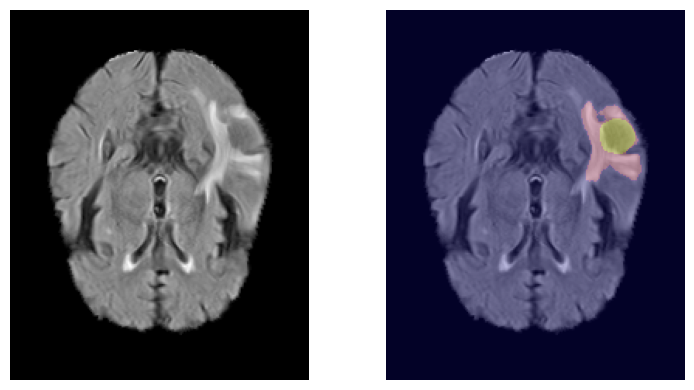

In [19]:
visualize_segmentation(
    modality_file= path + "/sub-01009590_FLAIR_preprocessed.nii.gz",
    segmentation_file= path + "/output/t1c_segmentation.nii.gz",
)

In [3]:
path_to_test_folder = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/preprocessing/regensburg_sample_data/regensburg_test_patient/regensburg_test_patient_brainles/normalized_bet"
path_to_output = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/preprocessing/regensburg_sample_data/regensburg_test_patient"

In [4]:
config = AuroraInfererConfig(
    tta=False,
    # we disable test time augmentations for a quick demo
    # should be set to True for better results
    sliding_window_batch_size=4,
    # The batch size used for the sliding window inference
    # decrease if you run out of memory
    # warning: too small batches might lead to unstable results
    device="cpu",  # uncomment this line to force-use CPU
)

# Instantiate the AuroraInferer
inferer = AuroraInferer()

inferer = AuroraInferer(config=config)

# Use all four input modalities,we also create other outputs and a custom log file
_ = inferer.infer(
    t1=f"{path_to_test_folder}/regensburg_test_patient_t1_bet_normalized.nii.gz",
    t1c=f"{path_to_test_folder}/regensburg_test_patient_t1c_bet_normalized.nii.gz",
    t2=f"{path_to_test_folder}/regensburg_test_patient_t2_bet_normalized.nii.gz",
    fla=f"{path_to_test_folder}/regensburg_test_patient_fla_bet_normalized.nii.gz",
    segmentation_file=f"{path_to_output}/output/multi-modal_segmentation.nii.gz",
    # The unbinarized network outputs for the whole tumor channel (edema + enhancing tumor core + necrosis) channel
    whole_tumor_unbinarized_floats_file=f"{path_to_output}/output/whole_tumor_unbinarized_floats.nii.gz",
    # The unbinarized network outputs for the metastasis (tumor core) channel
    metastasis_unbinarized_floats_file=f"{path_to_output}/output/metastasis_unbinarized_floats.nii.gz",
    log_file=f"{path_to_output}/output/custom_logfile.log",
)

[INFO     | inferer         | L115  ] | 2024-04-22T14:02:06+0200: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device=<Device.AUTO: 'auto'>, cuda_devices='0', tta=True, sliding_window_batch_size=1, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-04-22T14:02:06+0200: Set torch device: cpu
[INFO     | inferer         | L115  ] | 2024-04-22T14:02:06+0200: Initialized AuroraInferer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>)
[INFO     | inferer         | L148  ] | 2024-04-22T14:02:06+0200: Set torch device: cpu


─────────────────────────────────────────── Thank you for using AURORA ────────────────────────────────────────────

Please support our development by citing the papers listed here:

https://github.com/BrainLesion/AURORA#citation -- Thank you!

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[INFO     | inferer         | L191  ] | 2024-04-22T14:02:06+0200: Infer with config: AuroraInfererConfig(log_level=20, device='cpu', cuda_devices='0', tta=False, sliding_window_batch_size=4, workers=0, threshold=0.5, sliding_window_overlap=0.5, crop_size=(192, 192, 32), model_selection=<ModelSelection.BEST: 'best'>) and device: cpu
[INFO     | data            | L138  ] | 2024-04-22T14:02:06+0200: Successfully validated input images (received 4). Input mode: DataMode.NIFTI_FILE
[INFO     | data            | L160  ] | 2024-04-22T14:02:06+0200: Received files: T1: True, T1C: True, T2: True, FLAIR: True
[INFO     | data            | L169  ] | 2024-04-22T14:02:06+0200: Inference mode: InferenceMode.T1_T1C_T2_FLA
[INFO     | model           | L58   ] | 2024-04-22T14:02:06+0200: No loaded compatible model found (Switching from None to InferenceMode.T1_T1C_T2_FLA). Loading Model and weights...
[INFO     | model           | L63   ] | 2024-04-22T14:02:06+0200: Successfully loaded model.
[INFO   

BasicUNet features: (32, 32, 64, 128, 256, 32).
before: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/InferenceMode.T1_T1C_T2_FLA_ModelSelection.BEST.tar
after: /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/Brain_Mets_Classification/brain_mets_env/lib/python3.11/site-packages/brainles_aurora/weights/t1-t1c-t2-fla_best.tar


[INFO     | model           | L214  ] | 2024-04-22T14:07:56+0200: Post-processing data
[INFO     | model           | L218  ] | 2024-04-22T14:07:56+0200: Returning post-processed data as Dict of Numpy arrays
[INFO     | inferer         | L218  ] | 2024-04-22T14:07:56+0200: Finished inference
[INFO     | inferer         | L222  ] | 2024-04-22T14:07:56+0200: Saving post-processed data as NIfTI files
[INFO     | data            | L263  ] | 2024-04-22T14:07:56+0200: Saved Output.SEGMENTATION to /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/preprocessing/regensburg_sample_data/regensburg_test_patient/output/multi-modal_segmentation.nii.gz
[INFO     | data            | L263  ] | 2024-04-22T14:07:57+0200: Saved Output.WHOLE_NETWORK to /Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/preprocessing/regensburg_sample_data/regensburg_test_patient/output/whole_tumor_unbinarized_floats.nii.gz
[INFO     | data            | L263  ] | 2024-04-22T14:07:57+0200: Saved Output.METASTASIS_NETWORK to /Users/L

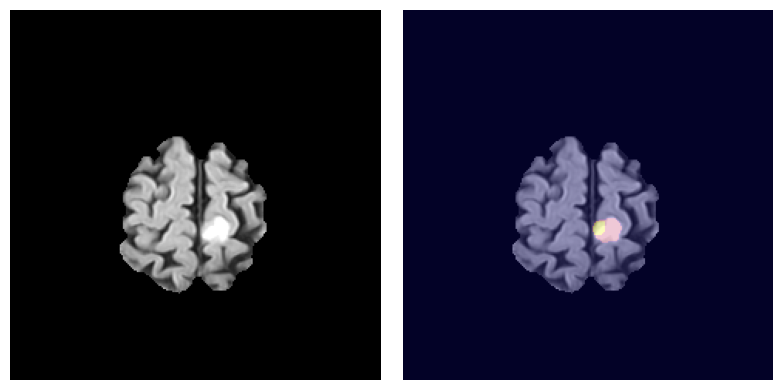

In [9]:
visualize_segmentation(
    modality_file= path_to_test_folder + "/regensburg_test_patient_fla_bet_normalized.nii.gz",
    segmentation_file= "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Code/preprocessing/regensburg_sample_data/regensburg_test_patient/output/multi-modal_segmentation.nii.gz",
)